https://youtu.be/TIlDzLZPyhY

#### Regret Optimality 
##### Minimizing - Total reward over the process of learning, the initilai loss due to the exploration is minimized so that the optimal case can be achieved as quickly as possible

In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [5]:
dataset = pd.read_csv('./Ads_CTR_Optimisation.csv')

## Implementing The UCB


##### In reinforcefement learning we want to find the optimal way to do something using the least number of steps. 
In this example we want to check if a  ad is sitable to be published and we do that by sending to initial 10k customers. But we wish to get the answer beffore all 10k see it. So we use the ucb algorithm. 
We have 10 samples of ads and we wish to find the best one among them 

What the UCB algorithm will do is, 
it will send the 10 ads to each customer at a time and will receive a feedback, if the person clicks the ad feedback = reward = 1, if not then reward = 0. 
We want to check as soon as possible if a certain ad is cl being clicked by omore people that other and.
What UCB does is it will run on theese ad s one user at a time, collect there feedback and also check how many times the add has been shown to i.e. the number of users the ad has been show to. 
Then as the first step it will calculate the average reward for every user, for e.g. if  add is clicked('1') one time in the first user its avg_reward will be 1/1, if the add i clicked for the sefcond time overall by the fifth user, its avg_reward will be 2/5. 
Then for every user the ad is shown, ucb dynamically calculates the confidence interval by using the given formula. And tries to find the upper confience  bound of that particular ad by adding average reward and the confidence interval. 
For the first user when the ad is being show for the first time, we do the 1e400 trick to instantiate its ucb so that we can use it for later user when it becomes zero again. 
With each passing user, if the number of clicked increases, thanks to the formula the upper confidence bound will keep on reducing and the number of rewards will keep on increasing. 
The ads selected array is the array of the most selected ads, in the end the most frequent ads will be selected even before the entire 10k users have been shown the add based on the upper confidence bound.

In [18]:
import math
# N = 500
# N = 1000
N = 5000
# N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0, N): 
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            ## THEOROTICALLY THE CONFIDENCE INTERVAL GOES IN REDUCING WITH MORE THE NO. OF ADS CLICKED
            ## IN IMPLEMENTATION WHEREAS THE UCB GOES ON INCREASING 
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
            ## AND BECAUSE OF THIS CONDITION, WHENEVER THE UCB IS > MAX_UCB, IT IS CONSIDERED MAX_UCB
            ## AND THAT AD IS SELECTED
            ## THUS THE AD WITH THE HIGHEST UCB IS SELECTED MORE THAN OTHERS. 
            ## IT IS THE SAME LOGIC, BUT EASIER TO IMPLEMENT
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

In [19]:
## visualizing the results

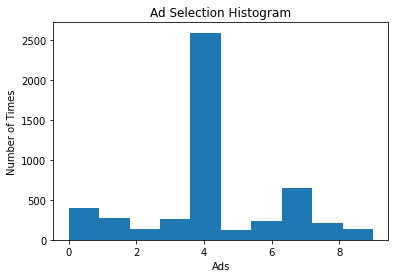

In [20]:
plt.hist(ads_selected)
plt.title('Ad Selection Histogram')
plt.xlabel('Ads')
plt.ylabel('Number of Times')
plt.show()